In [1]:
import os
os.chdir('..')

from helpers.preprocessing import GexAdtPreprocess
from train import GexAdtTrainer
from evaluate import GexAdtEvaluation

In [2]:
gex_dim = 1000
gex_adt_preprocess = GexAdtPreprocess("data/multimodal/GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad",
    gex_dim=gex_dim
)

Reading dataset...


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Feature selecting GEX...


Trying to set attribute `._uns` of view, copying.



New GEX dim: 1000;
New ADT dim: 134;
AnnData dataset's shape: (90261, 1134)



In [3]:
latent_dim = 128
gexenc = [1000, 800, 200]
gexdec = [50, 100]
adtenc = [100, 80, 70]
adtdec = [10, 30]
model = [gexenc, gexdec, adtenc, adtdec]
init = "xavier"
lr = 0.00001
weight_decay = 0.02279
gex_adt_trainer = GexAdtTrainer(
    gex_adt_preprocess, latent_dim, model=model,
    init=init, lr=lr, weight_decay=weight_decay
)

Initializing dataset and dataloader...
The order of labels: ['s1d1', 's1d1', 's1d1', 's1d1', 's1d1', ..., 's4d9', 's4d9', 's4d9', 's4d9', 's4d9']
Length: 90261
Categories (12, object): ['s1d1', 's1d2', 's1d3', 's2d1', ..., 's3d7', 's4d1', 's4d8', 's4d9']
The device: cuda;

The model: DeepGexAdtMultiModalAutoencoder(
  (gex_encoder): Sequential(
    (0): Linear(in_features=1000, out_features=1000, bias=True)
    (1): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=1000, out_features=800, bias=True)
    (5): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Linear(in_features=800, out_features=200, bias=True)
    (8): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Dropout(p=0.1, inplace=False)
    (11): Linear(in_features=200, out_features=64, bias=True)
    

In [4]:
epochs = 80
gex_weight = 5.108
adt_weight = 42.999
gex_adt_trainer.train(epochs=epochs, gex_loss_w=gex_weight, adt_loss_w=adt_weight, wandb_log=False)

Epoch 0 recon loss: 22223.7422800863
Epoch 1 recon loss: 22322.9494377604
Epoch 2 recon loss: 21440.506034035
Epoch 3 recon loss: 21870.6784954215
Epoch 4 recon loss: 22573.0197299008
Epoch 5 recon loss: 22597.126681965
Epoch 6 recon loss: 21904.2823269587
Epoch 7 recon loss: 22269.2614821445
Epoch 8 recon loss: 22202.6802967583
Epoch 9 recon loss: 22671.7412536833
Epoch 10 recon loss: 22494.7056746379
Epoch 11 recon loss: 22619.5458353108
Epoch 12 recon loss: 22434.5307353204
Epoch 13 recon loss: 22600.0821651565
Epoch 14 recon loss: 20584.4297317599
Epoch 15 recon loss: 22157.4912258575
Epoch 16 recon loss: 21824.2552870413
Epoch 17 recon loss: 20740.5891903557
Epoch 18 recon loss: 21634.1247679267
Epoch 19 recon loss: 22056.4671965721
Epoch 20 recon loss: 22245.2161369681
Epoch 21 recon loss: 22478.4972702617
Epoch 22 recon loss: 22564.0448651359
Epoch 23 recon loss: 20686.0500257091
Epoch 24 recon loss: 22242.1726827316
Epoch 25 recon loss: 22496.7964086172
Epoch 26 recon loss: 225

In [5]:
gex_adt_eval = GexAdtEvaluation(
    gex_adt_trainer, gex_adt_preprocess
)


Latent space type: <class 'numpy.ndarray'>;
GEX encoded shape: torch.Size([90261, 64]);
ADT encoded shape: torch.Size([90261, 64]);
Latent space shape: (90261, 128);



0.6266037855631752
   celltype_ari  celltype_ami  celltype_homogeneity  celltype_complete  \
0      0.298207      0.605403              0.618803           0.594364   

   batch_ari  batch_ami  batch_homogeneity  batch_complete  
0   0.894431   0.735818           0.693499        0.767125  


... storing 'feature_types' as categorical
... storing 'gene_id' as categorical


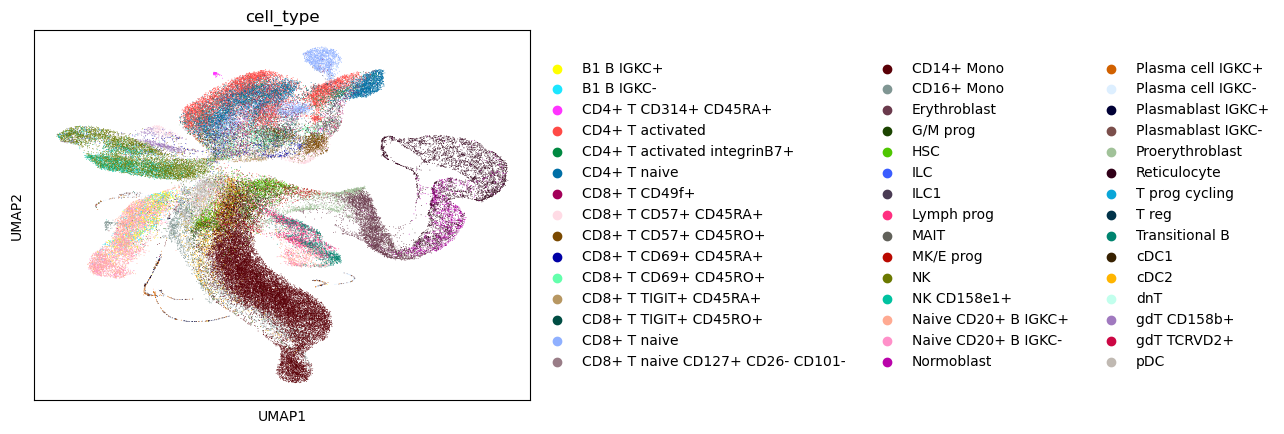

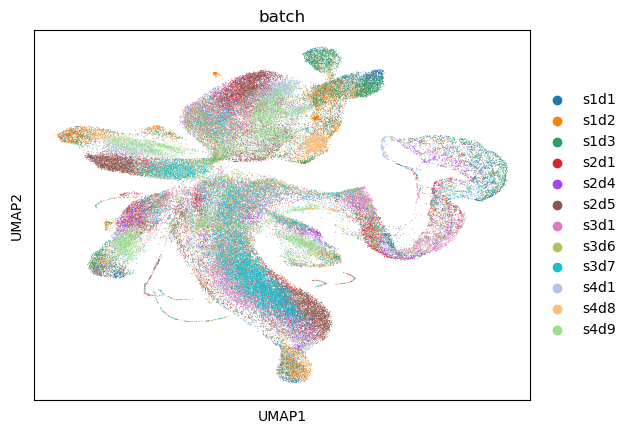

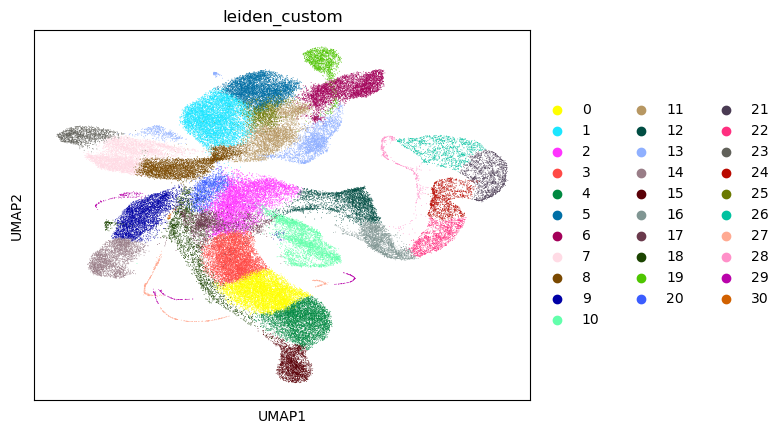

(0.6266037855631752,
    celltype_ari  celltype_ami  celltype_homogeneity  celltype_complete  \
 0      0.298207      0.605403              0.618803           0.594364   
 
    batch_ari  batch_ami  batch_homogeneity  batch_complete  
 0   0.894431   0.735818           0.693499        0.767125  )

In [6]:
gex_adt_eval.evaluate()